In [1]:
# Run this cell, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

# 1. Optimization

First came marbles; now Data 8 is branching out into the ice cream market.  We're catering to San Francisco hipsters, so we operate a truck that sells our fresh organic Sriracha-Kale ice cream.  Today we have driven our truck to Ocean Beach, a long, narrow beach on the western coast of the city.

<img src="ocean_beach.jpg">

Upon arriving, we find that our potential customers are spread out along the beach.  We decide we want to park our truck in the location that's closest *on average* to all the customers.  That way, customers will be more likely to come to our truck.

(This may not be a great way to choose our truck's location.  Maybe you can think of a better way to decide on a location.)

We canvas the beach and record the location of each beachgoer in a table called `customers`.  The beach is oriented roughly North/South, and it's narrow, so we ignore how close each beachgoer is to the water, and record only how far north each person is from the southern end of the beach.

<img src="beach_locations.jpg">

Suppose there are 2 people on the beach, at 600 meters and 950 meters from the Southern end, respectively.  If we park our truck at 750 meters, the average distance from our truck to customers is:

$$\frac{|600 - 750| + |950 - 750|}{2},$$

Here are two ways to write that in Python:

In [2]:
# A direct translation:
(abs(600 - 750) + abs(950 - 750)) / 2

175.0

In [3]:
# Here is a craftier translation of the math into Python,
# using arrays.  Notice that if we had many more customers,
# all we'd have to change is the q10_customer_distances
# array.

# The customer locations:
q10_customer_locations = np.array([600, 950])

# Our location:
q10_truck_location = 750

# Now we compute the differences between those locations and
# ours.  Note that these are negative, so they don't really
# make sense.
q10_differences = q10_customer_locations - q10_truck_location

# What we really want is the *distances on the number line*
# between the customer locations and ours, which are the absolute
# values of the differences.  np.abs computes the absolute
# values of each number in an array, returning an array of those
# absolute values (with the same length as the array you give it).
q10_distances = np.abs(q10_differences)

# Now we just average those.
q10_avg_distance = np.mean(q10_distances)
q10_avg_distance

175.0

**Question 1.1.** Suppose there were only 3 people on the beach, and their locations were 800, 1000, and 1800 meters from the Southern end, respectively.  If we park our ice cream truck at the mean of those locations, what is the average distance from our truck to customers?

In [4]:
q11_customer_locations = np.array([800, 1000, 1800])

# Compute this.
q11_avg_distance = np.mean(np.abs(q11_customer_locations - np.mean(q11_customer_locations)))
q11_avg_distance

400.0

**Question 1.2.** If we park our truck at 1100 meters instead, what's the average distance from our truck to a customer?

In [5]:
q12_avg_distance = np.mean(np.abs(q11_customer_locations - 1100))
q12_avg_distance

366.66666666666669

**Question 1.3.** Which location would be better, according to the criterion we're using?

In [6]:
q13_better_location = 1100

Now we'll introduce the full dataset.  Run the next cell to load it.

Distance from south end (m)
278.819
1234.84
765.672
1857.39
1759.31
671.602
207.426
1046.42
1629.44
443.936


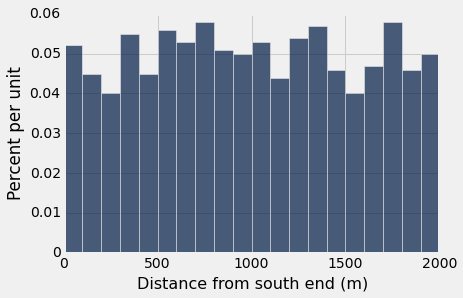

In [7]:
# Just run this cell.
customers = Table.read_table("customers.csv")
customers.hist(bins=np.arange(0, 2001, 100))
customers

Let's think very precisely about what we're trying to optimize.  Given these customer locations, we want to find a *single location*.  If we park our truck at that location, we want it to result in the smallest *average distance from our truck to customers*.

**Question 1.4.** Write a function called `average_distance`.  It should take a single number as its argument (a truck location) and return the average distance from that location to the customers in the `customers` table.  At a high level, this function tells us how badly we're meeting our objective.  So it's called an *objective function*.  We'll eventually want to find the distance that produces the smallest value of this objective function.

In [8]:
def average_distance(truck_location):
    return np.mean(np.abs(customers.column(0) - truck_location))

average_distance(1100)

497.99221233339301

Here's one way to find the best location using a computer:

1. Check a bunch of locations,
2. compute the average distance (the value of our objective function `average_distance`) for each one, and
3. pick the location with the smallest average distance.

This is called a "brute-force" technique because it uses a lot of computation.  But it gets the job done.

**Question 1.5.** First we'll examine the distances manually to find the best spot.  To do that we need to visualize them.  Fill in the code below to make a graph of the objective function.

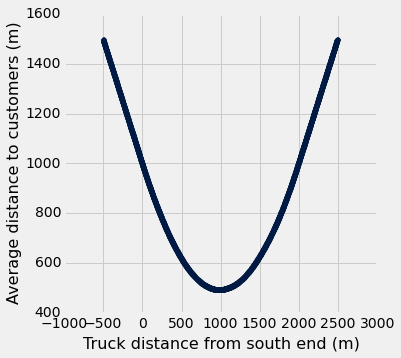

In [9]:
lowest_location = int(min(customers.column(0))) - 500
highest_location = int(max(customers.column(0))) + 501
locations = np.arange(lowest_location, highest_location, 1)
potential_locations = Table().with_column("Truck distance from south end (m)", locations)

average_distances = np.array(potential_locations.apply(average_distance, "Truck distance from south end (m)"))

locations_with_distances = potential_locations.with_column(
    "Average distance to customers (m)", average_distances)
locations_with_distances.scatter(0, 1)

**Question 1.6.** Looking at the graph, what would you say is the best location, rounded to the nearest 100?

In [10]:
# Fill in your guess here
q16_best_location_guess = 1000

**Question 1.7.** Instead of looking at a graph, we can have the computer find the best location for us (among all the locations we tried).  Do that using the `locations_with_distances` table you created.

In [11]:
q17_best_location = locations_with_distances.sort("Average distance to customers (m)", descending=False).column(0).item(0)
q17_best_location

992

The function `minimize` does basically the same thing you just did.  It takes as its argument a *function*, the objective function.  It returns an *array* of inputs that produces the smallest output value of the objective function.  For example, here's a function and its graph:

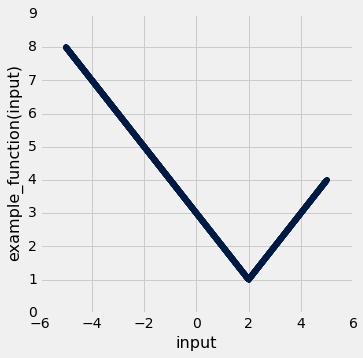

In [12]:
# Just run this cell.

# Here's an example function we might want to minimize:
def example_function(x):
    return abs(x - 2) + 1

# This makes a graph of its values at various points.
example_inputs = Table().with_column("input", np.arange(-5, 5, .001))
example_values = example_inputs.with_column("example_function(input)", example_inputs.apply(example_function, 0))
example_values.scatter(0, 1)

This graph shows us a few things:
1. The minimum value of `example_function` is 1.
2. That value is `example_function(2)`.
3. Therefore, we say that the input 2 *minimizes* `example_function`.

Calling `minimize` on `example_function` verifies this:

In [13]:
# Just run this cell.
minimizing_arg = minimize(example_function)
minimum_value = example_function(minimizing_arg)
print("example_function is minimized at", minimizing_arg, "with value", minimum_value)

example_function is minimized at 2.0 with value 1.0


In [14]:
minimize(example_function)

2.0

**Question 1.8** Use `minimize` to find the best location for our ice cream truck.

In [15]:
# Write code to compute the best location, using minimize.
q18_best_location = (minimize(average_distance))
q18_best_location

993.1627684

Two hours later we find that most people on the beach have moved or left, so the pattern of customer locations is different.  The data for the next day are in `customers2.csv`.  

Distance from south end (m)
883.277
619.053
634.417
617.779
654.781
1120.19
549.431
945.256
785.69
808.331


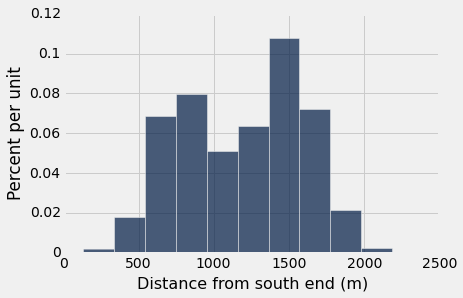

In [16]:
# Just run this cell.
q19_customers = Table.read_table("customers2.csv")
q19_customers.hist()
q19_customers

**Question 1.9.** Find the new best location for our truck.

*Hint:* You'll have to define a new function.  We're just redoing the work in questions 1.4 and 1.8 for a new dataset.

In [17]:
# Find the best location using q19_customers.
def avg_day2(truck_location):
    return np.mean(np.abs(q19_customers.column(0) - truck_location))
    
q19_best_location = minimize(avg_day2)
q19_best_location

1248.7877497

# 2. Regression
We're going to use linear regression to estimate the age of the universe.

In the early 20th century, the most popular cosmological theory suggested that the universe had always existed at a fixed size.  Today, the Big Bang theory prevails: Our universe started out very small and is still expanding.

A consequence of this is Hubble's Law, which says that the expansion of the universe creates the appearance that every galaxy near us is moving away from us at a constant rate.  If we extrapolate that motion backwards to the time when all galaxies would have been on top of each other, that time is (roughly) the beginning of the universe!

## 2.1. Analogy: driving
Here's an analogy.

Suppose that some time ago, Mei started driving in a car going 60 miles per hour in a straight line away from us.  We want to know how long she's been driving, but we forgot to record the time when she left.  If we find out that she's 120 miles away, we can infer that she left 2 hours ago.

Run the next cell to see a pictorial interpretation of that logic:

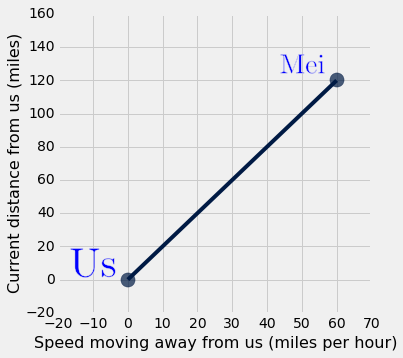

In [18]:
# Just run this cell.
small_driving_example = Table().with_columns([
        "Name", ["Us", "Mei"],
        "Current distance from us (miles)", [0, 120],
        "Speed moving away from us (miles per hour)", [0, 60]
    ])

small_driving_example.scatter(2, 1, s=200, fit_line=True)

# Fancy magic to draw each person's name with their dot.
for i in range(small_driving_example.num_rows):
    name = small_driving_example.column(0).item(i)
    x = small_driving_example.column(2).item(i)
    y = small_driving_example.column(1).item(i)
    plt.scatter([x - 10], [y + 10], s=2000, marker="$\mathrm{" + name + "}$")

The slope of the line is 2 hours.  (The units are vertical-axis units divided by horizontal-axis units, which are $\frac{\texttt{miles}}{\texttt{miles} / \texttt{hour}}$, or hours.)  So that's our answer.

Imagine that you don't know Mei's exact distance or speed, only rough estimates of them.  Then if you drew this line, you'd get a slightly bad estimate of the time since she left.  But if you measured the distance and speed of thousands of people who left you at the same time going different speeds, and drew a line between them, the slope of that line would be a pretty good estimate of the time they left, even if the individual measurements weren't exactly right.

The `drivers.csv` dataset contains the speeds and distances-from-start of 100 drivers who all left the same starting location at the same time, driving at a fixed speed on a straight line away from the start.  The measurements aren't exact.  Here we've created a scatter plot and drawn a line through the data.

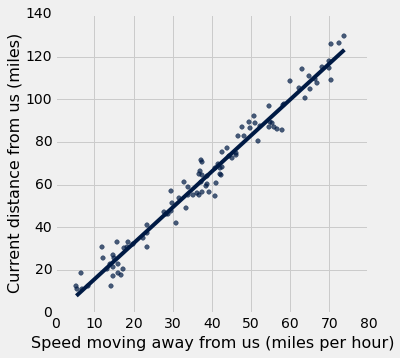

In [19]:
# Just run this cell.
Table.read_table("drivers.csv").scatter(0, 1, fit_line=True)

**Question 2.1.1.** By looking at the fit line, estimate how long ago (in hours) the drivers left.

In [20]:
# Fill in the start time you infer from the above line.
q211_start_time_hours = 120/70
q211_start_time_hours

1.7142857142857142

## 2.2. Back to cosmology
To do the same thing for the universe, we need to know the distance-from-Earth and speed-away-from-Earth of many stars.  Using pictures taken by very accurate telescopes and a lot of physics, astronomers have been able to estimate both.  It turns out that *nearby supernovae* -- stars that have recently died and exploded -- are among the best sources of this data.  This picture taken by the Hubble telescope shows an entire galaxy, with one bright supernova at the bottom left.

<img src="supernova.jpg">

Our astronomical data for today will come from the [Supernova Cosmology Project](http://supernova.lbl.gov/union/) at Lawrence Berkeley Lab.  The original dataset is [here](http://supernova.lbl.gov/union/figures/SCPUnion2.1_mu_vs_z.txt), with (brief) documentation [here](http://supernova.lbl.gov/union/descriptions.html#Magvsz).  Each row in the table corresponds to a supernova near Earth that was observed by astronomers.  From pictures like the one above, the astronomers deduced how far away each supernova was from Earth and how fast it was moving away from Earth.  Their deductions were good, but not perfect.

Run the cell below to load the data into a table called `close_novas` and make a scatter plot.

Distance (million parsecs),Speed (parsecs/year)
117.305,0.00873361
217.007,0.0153418
230.961,0.0162256
85.2853,0.00528131
185.051,0.0129474
212.841,0.0138862
151.728,0.0111837
82.6121,0.0060085
104.029,0.00838228
124.778,0.00812078


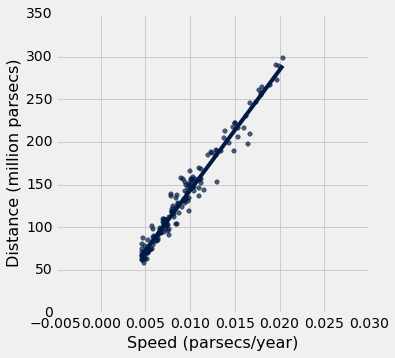

In [21]:
# Just run this cell.
close_novas = Table.read_table("close_novas.csv")

close_novas.scatter(1, 0, fit_line=True)
close_novas

**Question 2.2.1.** Looking this plot, make a guess at the age of the universe.

*Note:* Parsecs are a big unit of distance, equivalent to 30.86 trillion kilometers.

In [22]:
# Fill this in manually by examining the line above.
q221_universe_age_years = 15 * 1000000000

# This just shows your guess as a nice string, in billions of years.
"{:,} billion years".format(round(q221_universe_age_years / 1e9, 2))

'15.0 billion years'

## 2.3. Fitting the line yourself
`fit_line=True` is convenient, but to really understand regression, you need to peek under the hood.  Inside, `scatter` uses an optimization procedure to compute the line it draws.  The least-squares regression line for our supernova data is
* the line
* with the smallest average (over all the supernovae we observe)
* error,
* squared,
* where the error is the difference between the prediction based on the line and the supernova's actual distance from Earth.

This plot shows one line we could try to use to fit this dataset, along with the errors made by that line for a few of the supernovas.  Squaring the length of each red bar, then averaging those squared lengths, tells us how badly the line fits.

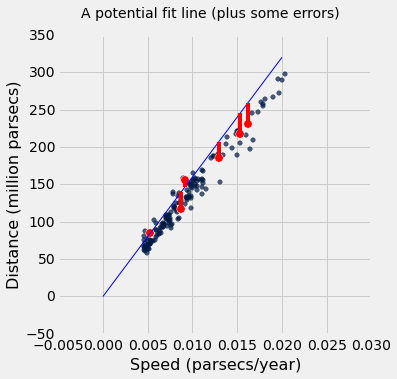

In [23]:
# Just run this cell.

# Plot all the novas first.
close_novas.scatter("Speed (parsecs/year)", "Distance (million parsecs)")
plt.suptitle("A potential fit line (plus some errors)")

# Over that plot, plot the proposed line, which is a little
# bit too high.
slope = 16000
right_line_end = 0.02
plt.plot([0.0, right_line_end], [0, slope*right_line_end], "b-", linewidth=1)

# Plot some of the errors:
novas_sample = close_novas.take([0, 1, 2, 3, 4, 41])
plt.scatter(novas_sample.column(1), novas_sample.column(0), c="r", zorder=2, s=70)
for i in range(novas_sample.num_rows):
    x = novas_sample.column("Speed (parsecs/year)").item(i)
    y = novas_sample.column("Distance (million parsecs)").item(i)
    line_y = slope*x
    plt.plot([x, x], [y, line_y], "r-")

What we want is to choose a line that minimizes the average squared error.  To simplify things, we'll assume that the vertical intercept of our lines is 0 (since the physical model implies that's true).  So we only have to choose one thing, the *slope* of the line.  We'll do it in steps.

First we need a way to compute errors.  To compute errors, we have to compute the predictions we'd make if we modeled the data with a line.  The function below takes a line's slope and an *array* of speeds and returns an array of predicted distances using that line (with intercept 0):

In [24]:
# Just run this cell.
def predicted_distances(line_slope, speeds):
    return line_slope * speeds

**Question 2.3.1.** Use `predicted_distances` to compute the predictions of a line with slope 16,000 for the `close_novas` dataset.  (These are the distances we'd predict if we knew the universe were $16000 \times 1000000$, or 16 billion, years old.)  Call these `q231_predictions`.  The following line makes a scatter plot of these predictions.  The actual speed of each supernova is on the horizontal axis, and its predicted distance is on the vertical axis.

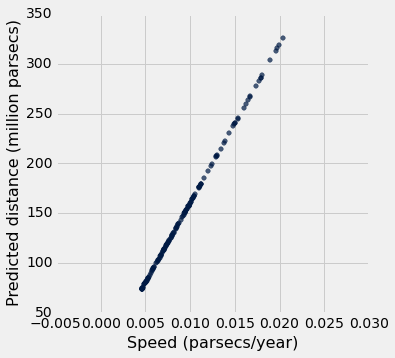

In [25]:
# Fill this in.
q231_predictions = predicted_distances(16000, close_novas.column(1))
close_novas.with_column("Predicted distance (million parsecs)", q231_predictions).scatter(1, 2)

The function `errors` takes a single argument, the slope of a line.  It returns an array of the prediction errors we get when we fit a line of that slope to the `close_novas` dataset.

In [26]:
def errors(line_slope):
    predictions = predicted_distances(line_slope, close_novas.column("Speed (parsecs/year)"))
    return predictions - close_novas.column("Distance (million parsecs)") 

**Question 2.3.2.** Using `errors`, compute the errors for the line with slope `16000` on the `close_novas` dataset.  Then make a scatter plot of the errors.

*Hint:* To make a scatter plot of the errors, plot the error for each supernova in the dataset.  Put the speed on the horizontal axis and the error on the vertical axis.

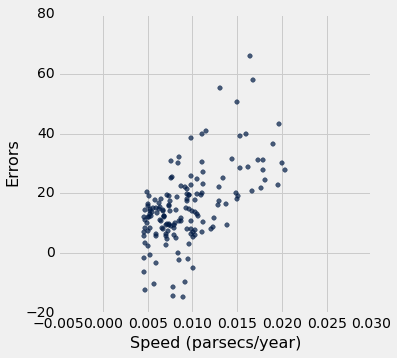

In [27]:
q232_errors = errors(16000)
close_novas.with_column("Errors", q232_errors).scatter(1, 2)

You should find that the errors are almost all positive.  That means our line is a little bit too steep.  Let's find a better one.

**Question 2.3.3.** Write a function called `mean_squared_error`.  It should take a single argument, the slope of a line.  It should return the average squared error for a line with that slope (and intercept 0) on the `close_novas` dataset.

In [28]:
def mean_squared_error(slope):
    return np.mean(errors(slope) ** 2)

Now that you've defined our objective function, we can graph it:

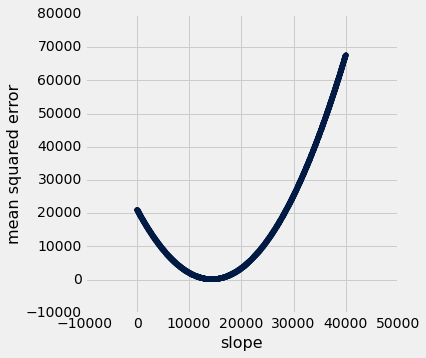

In [29]:
# Just run this cell.
slopes = Table().with_column("slope", np.arange(0, 40000, 10))
mses = slopes.with_column("mean squared error", slopes.apply(mean_squared_error, "slope"))
mses.scatter(0, 1)

And we can compute the best slope by calling `minimize` on it:

In [30]:
best_line_slope = minimize(mean_squared_error)

# This just shows your answer as a nice string, in billions of years.
"{:,} billion years".format(round(best_line_slope/1000, 4))

'14.3143 billion years'

That slope, as we've seen, is an estimate of the age of the universe.  The current best estimate of the age of the universe is 13.799 billion years.  Did we get close?

In [50]:
from ds8_minimize import *

# 3. Predicting House Prices
For many people, their house is their most valuable asset, so selling a house is an important event.  When deciding on a price to sell at, an owner wants to ask for the highest price at which she can sell the house in a reasonable amount of time.  Owners often ask real-estate agents to set the price, and these agents use their knowledge of the house and the local housing market to guess at the right price.

Let's see if we can do that with a computer instead, by mimicking prices other owners set for *similar* houses.  Since we're predicting a price, which is a number, this is a *regression* task.  And we want to use multiple pieces of information about a house to predict its price, so it's a *multiple* regression task.  Since we've learned about linear regression in this class, we'll do multiple *linear* regression.

The table `house_prices.csv` contains the listed prices of 566 houses sold in Southern California in 2009.    For each house, it also records several of the house's attributes:
* how big it is (in square feet),
* the number of bedrooms and bathrooms it has, and
* the house's location.

The locations are represented in a peculiar way that helps us use them in linear regression: There is a column for each potential location, and each house has a 1 in the column for its location and a 0 for the other location columns.  That's a common trick; some people call these kinds of columns "dummy variables".

The data come from researchers at Cal Poly; the original dataset can be found [here](https://wiki.csc.calpoly.edu/datasets/wiki/Houses).

Run the next cell to load and view the table.

In [51]:
house_prices = Table.read_table("house_prices.csv")
house_prices.show(10)

Price,Bedrooms,Bathrooms,Size,Santa Maria-Orcutt (0/1),Paso Robles (0/1),Atascadero (0/1),Nipomo (0/1),Arroyo Grande (0/1),Lompoc (0/1),Los Osos (0/1),Grover Beach (0/1),Paso Robles (0/1),San Miguel (0/1)
232600,3,3,1582,1,0,0,0,0,0,0,0,0,0
119000,1,1,900,1,0,0,0,0,0,0,0,0,0
220000,3,2,1112,0,0,0,1,0,0,0,0,0,0
169900,4,2,1500,1,0,0,0,0,0,0,0,0,0
186900,3,1,912,0,0,0,0,0,1,0,0,0,0
240000,4,2,1460,1,0,0,0,0,0,0,0,0,0
225000,3,2,1144,1,0,0,0,0,0,0,0,0,0
469000,3,2,1827,0,0,0,0,0,0,0,1,0,0
179000,3,2,1398,1,0,0,0,0,0,0,0,0,0
205000,3,2,1146,1,0,0,0,0,0,0,0,0,0


The idea is to use the attributes of each house to predict its price.  We'll take our training data, which has both attributes and actual prices, and find a model that produces good predictions for that data.  Then, if we wanted to list a house ourselves, we could predict our own house's price and use our prediction as our price instead of consulting an expert.  Of course, that wouldn't be a good idea if the model weren't very accurate, so we'll need to measure that, too.

Before we run any regressions, we need to think about how we'll evaluate the models we produce.  That means checking how accurate its predictions are -- something like the mean squared error or R-squared.

As we've seen in lecture, you don't get an accurate estimate of a model's predictive performance if you test it on the data you use to train it.  It's easy for a model to predict well on its training data -- remember linear regression with 2 data points, or 1-nearest-neighbor classification -- even if it doesn't make any sense.  The real test is how the model performs on other data from the population for which we're interested in making predictions.

So we need to hold out a *test set* that we'll only use to *test* the accuracy of the models we make, not to *train* them.

**Question 3.1.** Split `house_prices` into two separate tables called `train` and `test`.  `train` should include the first 300 rows from `house_prices`.  `test` should contain all the other rows of `house_prices`.  `house_prices` is currently in random order, so `train` and `test` will end up being two disjoint random samples from `house_prices`.

*Hint:* If `t` is a table, then `t.take(np.arange(300))` is a table consisting of the first 300 rows of `t`.  `t.exclude(np.arange(300))` is a table consisting of all the rows of `t` *except* the first 300.

In [52]:
# Divide up house_prices into train and test tables as described above.
train = house_prices.take(np.arange(300))
test = house_prices.exclude(np.arange(300))
train.show(3)
test.show(3)

Price,Bedrooms,Bathrooms,Size,Santa Maria-Orcutt (0/1),Paso Robles (0/1),Atascadero (0/1),Nipomo (0/1),Arroyo Grande (0/1),Lompoc (0/1),Los Osos (0/1),Grover Beach (0/1),Paso Robles (0/1),San Miguel (0/1)
232600,3,3,1582,1,0,0,0,0,0,0,0,0,0
119000,1,1,900,1,0,0,0,0,0,0,0,0,0
220000,3,2,1112,0,0,0,1,0,0,0,0,0,0


Price,Bedrooms,Bathrooms,Size,Santa Maria-Orcutt (0/1),Paso Robles (0/1),Atascadero (0/1),Nipomo (0/1),Arroyo Grande (0/1),Lompoc (0/1),Los Osos (0/1),Grover Beach (0/1),Paso Robles (0/1),San Miguel (0/1)
129900,3,1,1042,1,0,0,0,0,0,0,0,0,0
199900,4,2,1338,0,0,0,0,0,1,0,0,0,0
449900,4,3,3035,0,0,0,0,0,1,0,0,0,0


Okay, on to regression.

We're going to focus on using and interpreting multiple regression rather than computing models.  So we've written code below that will compute least-squares coefficients for you.  Peruse the code below, but the only thing you'll need to do with it is *calling* the functions it defines.  That means you should read the *documentation* (the stuff in triple-double quotes) but you don't need to read the *implementations* (the actual code in the body of each function).

**Question 3.2.** Read the documentation and define the following functions.

In [53]:
# Fill in the bodies of these functions:
def predict_all(features_table, coefficients):
    """
    Given a table of features called features_table and some coefficients,
    produces linear predictions for each row of features_table.
    
    features_table should be a table with one column for each feature
    being used to predict.  Each row represents a house in the task
    we're doing in this lab.
    
    coefficients should be an array with one element for each column in
    features_table, like the coefficients computed by the function
    least_squares_coefficients.
    
    Returns an array of predictions, one for each row of features_table.
    
    For example, in the house price prediction task we're working on in
    this lab, each row of data is the features of one house sale, like
    the number of bedrooms or the size of the house.  To make a
    prediction for the price of a house, we multiply each of these
    features by the corresponding coefficient in the coefficients
    array, then sum the results.
    
    An even more detailed example: Suppose we have just one house whose
    price we want to predict, and two features, Bedrooms and Size.
    Then features_table will have 1 row and 2 columns, Bedrooms and Size.
    Say their values are 2 and 1500.  The coefficients array will have 2
    numbers in it, say -1000 and 200.  Our prediction for this house is:

        features_table.column(0).item(0)*coefficients.item(0) + \
        data.column(1).item(0)*coefficients.item(1)
    
    or
    
        2*-1000 + 1500*200
    
    which is $298,000.  So we will return an array with just one number
    in it, and it will look like:
    
        np.array([298000])
    
    If there were 3 rows in features_table, we would return a 3-element
    array instead, containing the predicted prices for each row.
    
    The first argument to predict_all should be a table with one
    column for each feature.  That means it should have the same
    number of columns as the coefficients array (the second
    argument) has elements.
    """
    assert features_table.num_columns == len(coefficients)
    def predict(features):
        return sum(features * coefficients)
    predictions = Table().with_column('features', features_table.rows).apply(predict, 'features')
    return predictions

def compute_errors(features_table, coefficients, true_values):
    """
    Computes the prediction errors for a linear model with the given
    coefficients when predicting the true values for the given
    examples.
    
    features_table should be a table with one column for each feature
    being used to predict.  Each row represents a house in the task
    we're doing in this lab.
    
    coefficients should be an array of numbers, one for each feature.
    
    true_values should be an array of numbers, one for each row in
    features_table.  It records the true prices of each house.
    """
    return predict_all(features_table, coefficients) - true_values

def rmse(errors):
    """
    Computes the root mean squared error when a regression model makes
    the given errors.  So errors should be an array of numbers, one for
    each row in some data table for which we're computing predictions
    (that is, each house).  Each number is the prediction error of some
    regression model (when predicting the price of a house).
    """
    return np.mean(errors ** 2) ** 0.5

def make_least_squares_objective_function(features_table, true_values):
    """
    Makes an objective function for training data in the features_table
    table, where the true values we're trying to predict are true_values.
    
    features_table should be a table with one column for each feature
    being used to predict.  Each row represents a house in the task
    we're doing in this lab.
    
    true_values should be an array of numbers, one for each row in
    features_table.  It records the true prices of each house.
    
    The returned value is a function.  That function takes an array of
    coefficients and returns a number.  Larger values of that number
    mean that those coefficients produce worse prediction errors.
    """
    def objective_function(coefficients):
        errors = compute_errors(features_table, np.array(coefficients), true_values)
        return rmse(errors)
    return objective_function

def least_squares_coefficients(training_data, predicted_column_name):
    """
    Performs multiple linear regression predicting predicted_column_name
    using the other columns of training_data as features.
    
    training_data should be a table with one column for each feature
    being used to predict, plus one column for the value we're trying
    to predict.  That column's name should equal predicted_column_name.
    Each row represents a house in the task we're doing in this lab.
    
    predicted_column_name should be a string, the name of the column in
    training_data that we're trying to predict.
    
    Returns an array of coefficients, one for each feature (that is, one
    for each column in training_data other than predicted_column_name).
    
    For example, if training_data has 3 columns, Bedroom, Size, and Price,
    and predicted_column_name is "Price", then we will use Bedroom and
    Size to predict Price.  This function will return an array of 2
    numbers, a regression coefficient for Bedroom (like -1000) and a
    regression coefficient for Size (like 200).
    """
    features_table = training_data.drop(predicted_column_name)
    true_values = training_data.column(predicted_column_name)
    objective_function = make_least_squares_objective_function(features_table, true_values)
    initial_coefficient_guess = np.zeros(features_table.num_columns)
    best_coefficients = minimize(objective_function, start=initial_coefficient_guess)
    if features_table.num_columns == 1:
        return np.array([best_coefficients])
    else:
        return best_coefficients

The most important factor in a house's price is its size.  To start, we'll run a regression using only that feature.  Here's a plot of the root-mean-squared error for many different values of the slope.  (The slope multiplies the size, so we call it the "coefficient" for Size.)

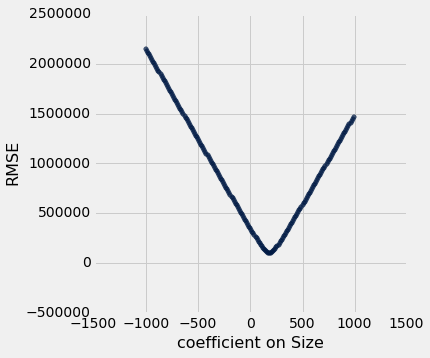

In [54]:
# Just run this cell.  It computes a bunch of slopes for potential
# lines, then computes the root-mean-squared error for each one.
# The best line for this dataset, a.k.a. the least-squares
# regression line, is the one where the RMSE is smallest.
slopes = Table().with_column("coefficient on Size", np.arange(-1000, 1000, 10))
objective_function = make_least_squares_objective_function(train.select("Size"), train.column("Price"))
def objective_value_for_slope(slope):
    return objective_function(np.array([slope]))
errors = slopes.with_column("RMSE", slopes.apply(objective_value_for_slope, "coefficient on Size"))
errors.scatter("coefficient on Size", "RMSE")

The next cell shows how to compute an array containing the slope of a regression of house price on house size.  There's no intercept, so our predictions using this very simple model are:

    predicted price = house size * just_size_coefficients.item(0)

If we see a new house that's 1000 square feet in size, and our coefficient is 200 (actually, it's technically 200 dollars per square foot), then we'd predict it costs \$200,000.  That's just a prediction, of course.  If it actually costs \$160,000, then our prediction error was \$40,000 for that house.

In [55]:
# Just run this cell.
# Here we compute the slope for a simple linear regression of price on
# size, with no intercept.
just_size = train.select(["Price", "Size"])
just_size_coefficients = least_squares_coefficients(just_size, "Price")
just_size_coefficients

array([ 183.9723662])

We saw in class that it's not a good idea to test how well a model does on the data we used to train it.  The line will work artificially well on the training data (`just_size`), compared to other similar houses whose prices we might be interested in predicting.

**Question 3.3.** In the next cell, to compute the *predicted prices* and *prediction errors* for each house in `test`.

*Hint:* If you read and understand `predict_all`, your answer could be very short.

In [56]:
# You can fill in this variable if you want.  It should be
# a table of the feature values (not the prices) for all
# the houses in the test set.  This will be useful in the
# next two lines.
just_size_test = test.select(["Size"])

# Compute the predictions for every house in the test table.
# FILL THIS PART IN.  You can add more lines if you want.
just_size_test_predictions = predict_all(just_size_test, just_size_coefficients)

# Compute the errors for every house in the test table.
# FILL THIS PART IN.  You can add more lines if you want.
just_size_test_errors = compute_errors(just_size_test, just_size_coefficients, test.column("Price"))

Run the next cell to see a plot of the errors our model makes on the test set, which you just computed.

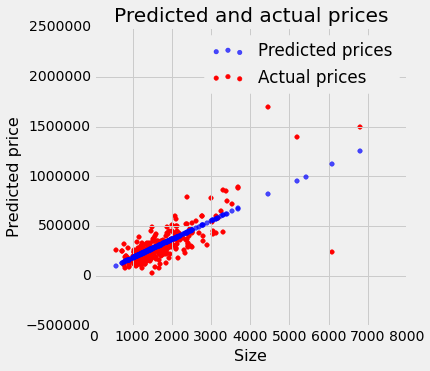

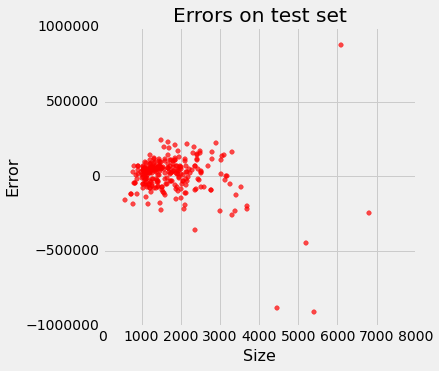

In [57]:
# Just run this cell.
# Here's a plot of the test errors.
Table().with_columns(["Size", test.column("Size"), "Predicted price", just_size_test_predictions]).scatter(0, 1, color="blue", label="Predicted prices")
plt.scatter(test.column("Size"), test.column("Price"), color="red", zorder=0, label="Actual prices")
plt.legend()
plt.title("Predicted and actual prices")

# And here's a plot of the errors.
Table().with_columns([
        "Size", test.column("Size"),
        "Error", just_size_test_errors
    ]).scatter(0, 1, color="red")
plt.title("Errors on test set")

A plot like the one above is useful, but there are other things we'd like to know about a regression.  The cell below defines a function called `display_errors` that displays some information about the errors made by a regression model.  

**Question 3.4.** Read the documentation for `display_errors` and define the following functions:

In [58]:
# Fill in the bodies of these functions:
def r_squared(errors, true_values):
    """
    Computes the R-squared value (the correlation, but for multiple
    regression, and squared) for a regression model when it produces
    certain errors.  So errors should be an array of numbers, one for
    each row in some data table for which we're computing predictions
    (that is, each house).  Each number is the prediction error of a
    regression model (when predicting the price of a house).  true_values
    should also be an array of numbers (the true price of each house).
    """
    return 1 - np.var(errors)/np.var(true_values)

def display_errors(data, predicted_column_name, coefficients):
    """
    After computing regression coefficients, we often want to investigate
    various aspects of the regression.  This function displays some
    information about the errors made by a regression model on the dataset
    in the data table:
    * A histogram of the errors.
    * The root mean squared error of the regression.
    * The R-squared value of the regression.  (That's like the square of
      the correlation, so it's between 0 and 1, and larger values mean
      the model made better predictions for these data.)
    
    The arguments are:
    1. The dataset on which we want to examine errors, like a training
       set to examine training residuals, or a test set to examine
       errors on the population.  It should contain one column for each
       feature, plus a column for the values we're trying to predict.
       Each row should represent one house.
    2. The name of the column in that table with the values we're trying
       to predict (e.g. "Price").
    3. An array of the coefficients produced by a linear regression,
       one for each column in the data table other than
       predicted_column_name.
    """
    features_table = data.drop(predicted_column_name)
    true_values = data.column(predicted_column_name)
    errors = compute_errors(features_table, coefficients, true_values)
    print("RMSE: ", rmse(errors))
    print("R-squared: ", r_squared(errors, true_values))
    
    # Make a histogram of the errors:
    biggest_error = max(errors)
    smallest_error = min(errors)
    num_ticks = int(len(errors) / 10)
    bin_width = (biggest_error - smallest_error) / num_ticks
    Table().with_column("error", errors).hist(bins=np.arange(smallest_error, biggest_error + bin_width, bin_width))

**Question 3.5.** In the next cell, use `display_errors` to display information about the *training-set residuals* of the regression of price on size.

RMSE:  100799.809864
R-squared:  0.640256648871


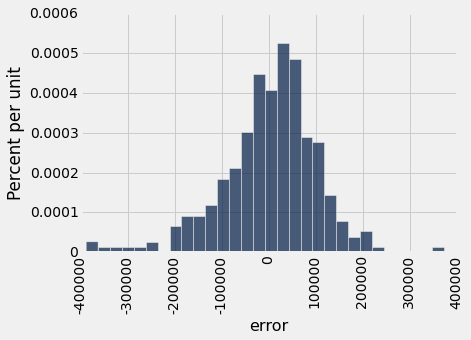

In [59]:
display_errors(just_size, "Price", just_size_coefficients)

**Question 3.6.** Now use `display_errors` to display information about the *test-set errors* of the regression of price on size.  (You computed those errors in question 3.3.)  Note whether the R-squared is smaller or larger than the R-squared on the training set.  Like correlation, a larger R-squared means that the model fits the data better.  How can you explain what you see?

RMSE:  135803.322621
R-squared:  0.627590752372


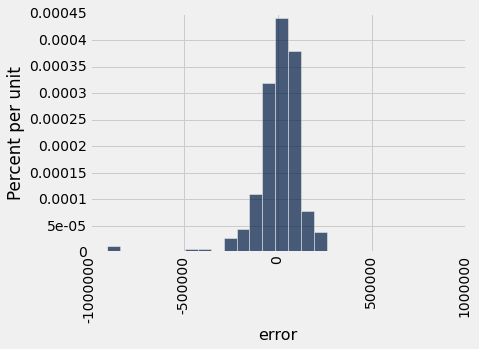

In [60]:
display_errors(test.select(["Price", "Size"]), "Price", just_size_coefficients)

**Question 3.7.** If the data were generated from the simple regression model we saw in class, the errors would be roughly bell-shaped and symmetric about 0.  Is that the case here, or are the errors skewed in one direction?

Yes, the errors are skewed right in this model.

**Question 3.8.** Now let's do a multiple regression.  Use `least_squares_coefficients` to compute the coefficients for a linear regression of price on *all* the columns of `train`.  This will take about a minute to run.

In [61]:
# Set coefficients to the coefficients of a least-squares linear
# regression of price on all the columns of the train table.
coefficients = least_squares_coefficients(train, "Price")
coefficients

array([ -1.17072391e+02,  -1.18280190e+04,   2.05488286e+02,
        -6.15398531e+04,   1.06818240e+04,   2.45781445e+04,
         2.46217481e+04,   1.29353658e+05,  -4.80673678e+04,
         7.09431380e+04,   7.59675008e+04,   4.67661692e+04,
        -3.38415964e+04])

**Question 3.9.** Using `display_errors`, display the residuals (the errors of the model on the data in `train`) and the test errors (the errors of the model on the data in `train`).  

RMSE:  82109.916722
R-squared:  0.761811618628
RMSE:  114794.961244
R-squared:  0.733261166208


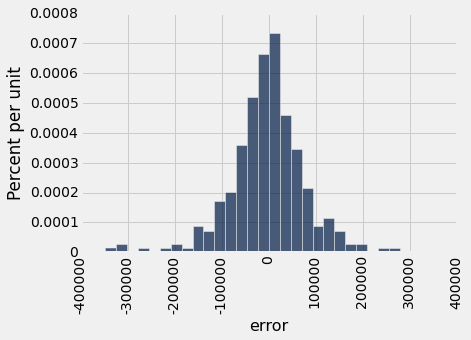

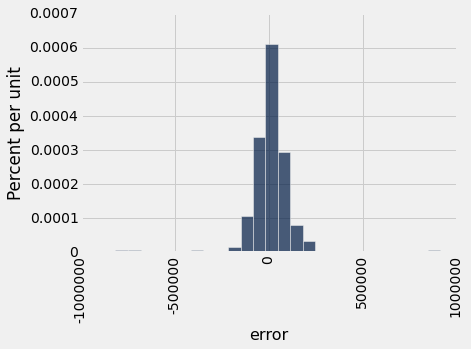

In [62]:
display_errors(train, "Price", coefficients)
display_errors(test, "Price", coefficients)

**Question 3.10.** Are the errors smaller or larger for this model than for the model that used only size to predict prices?

The errors are smaller, as shown by the R-squared value.

**Question 3.11.** Is the error smaller for the training set or for the test set?

The training set.

**Question 3.12.**  When we have a lot of coefficients, we have to do a bit of work to visualize them properly.  In the next cell, we've outlined a function called `display_coefficients` that displays some information about the coefficients produced by a regression.  Fill it in with code that matches the documentation.

Labels,Coefficients
Bedrooms,-117.072
Bathrooms,-11828
Size,205.488
Santa Maria-Orcutt (0/1),-61539.9
Paso Robles (0/1),10681.8
Atascadero (0/1),24578.1
Nipomo (0/1),24621.7
Arroyo Grande (0/1),129354
Lompoc (0/1),-48067.4
Los Osos (0/1),70943.1


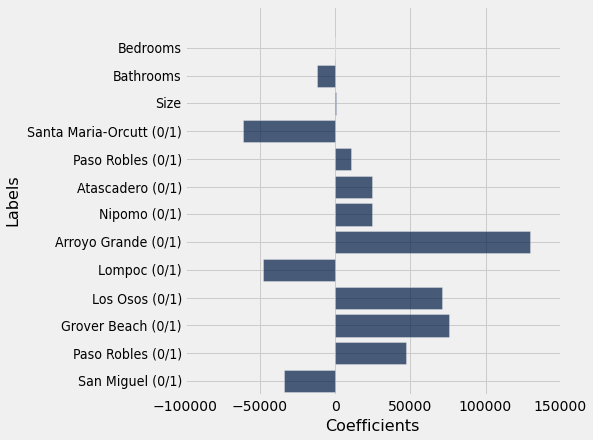

In [63]:
# Fill in the body of this function:
def display_coefficients(coefficient_labels, coefficients):
    """
    After computing regression coefficients, we often want to investigate
    various aspects of the regression.  This function displays information
    about the coefficients we found for each feature:
    * A table of coefficients (using show()), with a column for the
      labels of the coefficients (e.g. "Bedrooms") and a column for the
      coefficient values.
    * A bar chart of the coefficients, with one bar for each coefficient,
      labeled with its label (e.g. "Bedrooms").
    
    coefficient_labels is an array of strings, a name for each element
    of the coefficients array.
    
    coefficients is an array of numbers, one for each feature in some
    regression we've done.
    """
    # Our solution makes a table called coefficient_table, but you
    # don't have to do that.
    coefficient_table = Table().with_columns(
        (('Labels', coefficient_labels),
        ('Coefficients', coefficients))
    )
    coefficient_table.show()
    coefficient_table.barh("Labels","Coefficients")

# This will call your function on the coefficients you just learned.
display_coefficients(train.drop("Price").labels, coefficients)

A house sold in Arroyo Grande has a 0 for all the location columns other than "Arroyo Grande (0/1)" and a 1 for that column.  So the prediction for that house's price looks like:
    
    bedroom coefficient * # of bedrooms +
    bathroom coefficient * # of bathrooms + 
    size coefficient * size +
    Santa Maria-Orcutt coefficient * 0 + 
    Paso Robles coefficient * 0 + 
    ...
    Arroyo Grande coefficient * 1 + 
    Lompoc coefficient * 0 + 
    ...
    San Miguel coefficient * 0
    
This gives a nice interpretation for the Arroyo Grande coefficient.  We just add it to the predicted price of houses in Arroyo Grande, and for those houses we don't add the other location coefficients.

**Question 3.13.** What is the difference between the predicted price of a house in Arroyo Grande and the predicted price of a house with the same physical characteristics in Santa Maria-Orcutt, using the coefficients we've found?

In [64]:
predicted_price_difference = 19000
predicted_price_difference

19000